In [86]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.92541885671703 -72.75001284253254
12.097897789121873 -32.680311612654634
24.514881055823423 26.939476408640445
-56.4059731934045 -72.1741362533116
16.677313644772056 127.60824226749583
-65.16890199200864 128.9320423062543
78.6947833084599 -109.17128722612685
3.834760691214001 -94.57148179197608
-52.33660265377144 -62.02982017386755
-61.50567684960142 9.842131201302522
-17.379960812865107 -73.86307166293439
-25.213738888868377 43.58256662495353
66.83428707872298 -30.779346306813096
-23.60647421346121 60.04475919934555
27.860232606503857 172.81086996320823
-65.71003587392684 -15.108165747625293
-12.956400232842867 -137.46635916150282
24.548891756482746 40.60609864211412
31.055245617746905 88.18425019934512
40.38931321340661 -98.4294808441229
-66.32345054788844 141.31538167278137
-69.97223821329004 -79.55990107339956
71.00417332940799 160.01364821874427
-73.63221005563338 -17.862249856450887
49.62196385340144 -33.42626570220091
-83.93953394207567 102.02255805451068
57.62795360963585 1

69.46724883277355 -95.051997013506
80.49685013404226 -56.04209750581657
-40.838286036067466 -29.917182374049446
-34.601971959461956 41.72062120089626
-38.909020739760436 -141.10521707457303
82.83572354793515 41.439407871408775
-4.203055096233456 -0.2015772786917296
-10.4526881144524 42.43600262880733
-27.006809855599506 27.410108432261694
-42.75571085071521 137.75445681856206
83.55669086995755 50.824156991817006
69.52100873025856 -84.9837617812579
-89.00422830129594 -122.75701652931193
18.69970303656224 -10.558534405766295
9.632849444883107 72.6789282611575
19.29623788241105 -158.52064249739976
72.0403209349131 23.246536236534155
61.06303493578909 -110.68858946669657
-10.806950590444288 107.36254023320151
-15.196384021651895 167.13682265441622
54.09017071461764 -167.73879496904672
81.15700692786555 -38.42729416923123
29.104336414437583 129.5018262410752
-44.48191297409109 171.3654377336585
47.679527096948846 -173.67302166135747
27.205678458322268 -76.9949181512181
6.148126392712001 58.

-44.67651454538709 77.96712188613554
65.41618343006039 83.65660317808567
31.742909204110077 5.050462614600576
8.896581110688942 -152.75644290431757
56.18496732459468 178.02624533660259
-37.106806634994285 -77.97136778688017
62.16090263585454 -104.19944722748458
39.09829509015418 -19.475129532837713
80.6929696947831 -41.47982426742075
30.217829591167913 178.42610618238166
77.56227738642406 -46.71679847440424
-37.322145697011294 -125.05397239223552
24.075451857980596 -172.59961341682325
43.10723899560645 133.8660188676982
-64.44199605032276 -108.16356185896592
71.07774063905768 -113.39796697762917
40.869755771710714 4.82797715445551
-88.42236422309655 -68.24298308529671
-57.09841391918319 119.22136233320936
48.992305754187015 165.13986093212594
-9.273153624396357 153.4145147302998
-12.195102369681791 -62.30779167627857
74.03484266458096 -133.48041288811154
46.46684302643294 -11.124114262402031
57.92857406633968 -122.51847832375377
38.02943192129504 -167.19679167162238
-14.372650631345067

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [42]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [45]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18413bdee9bec14a4b7e2076a74c823c
Processing Record 1 of Set 1 | cauquenes
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | asyut
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | payo
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | ampanihy
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | mecca
Processing Record 19 of Set 1 | lasa
Processing Record 20 of Set 1 | hastings
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | cherskiy
Proces

In [51]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [63]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 10 of Set 13 | cauquenes
Processing Record 11 of Set 13 | sao filipe
Processing Record 12 of Set 13 | asyut
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 13 | payo
Processing Record 15 of Set 13 | new norfolk
Processing Record 16 of Set 13 | yellowknife
Processing Record 17 of Set 13 | puerto ayora
Processing Record 18 of Set 13 | ushuaia
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | camana
Processing Record 21 of Set 13 | ampanihy
Processing Record 22 of Set 13 | tasiilaq
Processing Record 23 of Set 13 | mahebourg
Processing Record 24 of Set 13 | butaritari
Processing Record 25 of Set 13 | cape town
Processing Record 26 of Set 13 | atuona
Processing Record 27 of Set 13 | mecca
Processing Record 28 of Set 13 | lasa
Processing Record 29 of Set 13 | hastings
Processing Record 30 of Set 13 | hobart
Processing Record 31 of Set 13 | cherskiy
Processing Record 32 of Set 13 | mar del plata
Processing Record 33 of Set 1

Processing Record 36 of Set 16 | praia
Processing Record 37 of Set 16 | makakilo city
Processing Record 38 of Set 16 | avarua
Processing Record 39 of Set 16 | carutapera
Processing Record 40 of Set 16 | sukhumi
Processing Record 41 of Set 16 | qaanaaq
Processing Record 42 of Set 16 | maroantsetra
Processing Record 43 of Set 16 | paamiut
Processing Record 44 of Set 16 | tubara
Processing Record 45 of Set 16 | nikko
Processing Record 46 of Set 16 | eyl
Processing Record 47 of Set 16 | victoria
Processing Record 48 of Set 16 | betafo
Processing Record 49 of Set 16 | talnakh
Processing Record 50 of Set 16 | peterhead
Processing Record 1 of Set 17 | eten
Processing Record 2 of Set 17 | pembroke
Processing Record 3 of Set 17 | ancud
Processing Record 4 of Set 17 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 17 | lebane
Processing Record 6 of Set 17 | vardo
Processing Record 7 of Set 17 | guiratinga
Processing Record 8 of Set 17 | alice springs
Processing Rec

Processing Record 23 of Set 20 | doha
Processing Record 24 of Set 20 | pervomayskiy
Processing Record 25 of Set 20 | riyadh
Processing Record 26 of Set 20 | jalu
Processing Record 27 of Set 20 | asau
Processing Record 28 of Set 20 | eldikan
City not found. Skipping...
Processing Record 29 of Set 20 | severo-yeniseyskiy
Processing Record 30 of Set 20 | san cristobal
Processing Record 31 of Set 20 | husavik
Processing Record 32 of Set 20 | snasa
Processing Record 33 of Set 20 | port moresby
Processing Record 34 of Set 20 | price
Processing Record 35 of Set 20 | karkaralinsk
City not found. Skipping...
Processing Record 36 of Set 20 | paranaiba
Processing Record 37 of Set 20 | oga
Processing Record 38 of Set 20 | ustye
Processing Record 39 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 20 | anjiang
Processing Record 41 of Set 20 | ust-maya
Processing Record 42 of Set 20 | iqaluit
Processing Record 43 of Set 20 | labuhan
Processing Record 44 of Set 20 | hamban

Processing Record 10 of Set 24 | abonnema
Processing Record 11 of Set 24 | yinchuan
Processing Record 12 of Set 24 | palu
Processing Record 13 of Set 24 | turtkul
City not found. Skipping...
Processing Record 14 of Set 24 | santona
Processing Record 15 of Set 24 | amarante do maranhao
Processing Record 16 of Set 24 | kapit
Processing Record 17 of Set 24 | zorritos
Processing Record 18 of Set 24 | richards bay
Processing Record 19 of Set 24 | kourou
Processing Record 20 of Set 24 | anloga
Processing Record 21 of Set 24 | matagami
Processing Record 22 of Set 24 | bharuch
Processing Record 23 of Set 24 | urengoy
Processing Record 24 of Set 24 | turkistan
Processing Record 25 of Set 24 | tomohon
Processing Record 26 of Set 24 | garowe
Processing Record 27 of Set 24 | biak
Processing Record 28 of Set 24 | diffa
Processing Record 29 of Set 24 | kabalo
Processing Record 30 of Set 24 | sheltozero
Processing Record 31 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 32 of Set 24 | santos

In [64]:
print(len(city_data))

569


In [65]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.24,130.99,87.80,29,100,8.05,AU,2020-11-04 01:10:24
1,Yulara,-25.24,130.99,87.80,29,100,8.05,AU,2020-11-04 01:10:24
2,Yulara,-25.24,130.99,87.80,29,100,8.05,AU,2020-11-04 01:10:24
3,Yulara,-25.24,130.99,87.80,29,100,8.05,AU,2020-11-04 01:10:24
4,Cauquenes,-35.97,-72.32,56.82,51,0,5.03,CL,2020-11-04 01:12:32
5,Sao Filipe,14.90,-24.50,78.40,74,100,4.03,CV,2020-11-04 01:13:41
6,Asyut,27.18,31.18,71.60,53,0,6.93,EG,2020-11-04 01:13:37
7,Punta Arenas,-53.15,-70.92,46.40,87,75,10.29,CL,2020-11-04 01:13:21
8,Payo,-3.75,103.64,79.41,76,100,0.85,ID,2020-11-04 01:17:17
9,New Norfolk,-42.78,147.06,73.40,43,75,17.22,AU,2020-11-04 01:17:17


In [67]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
newcity_data_df = city_data_df[new_column_order]
newcity_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
1,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
2,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
3,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
4,Cauquenes,CL,2020-11-04 01:12:32,-35.97,-72.32,56.82,51,0,5.03
...,...,...,...,...,...,...,...,...,...
564,La Ronge,CA,2020-11-04 01:18:36,55.10,-105.28,44.60,70,100,2.24
565,Preobrazheniye,RU,2020-11-04 01:15:23,42.90,133.91,34.43,71,0,14.27
566,Mahon,ES,2020-11-04 01:18:36,39.89,4.27,60.80,82,94,14.99
567,Paungde,MM,2020-11-04 01:18:36,18.48,95.50,76.82,91,0,3.04


In [68]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
newcity_data_df.to_csv(output_data_file, index_label="City_ID")

In [69]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

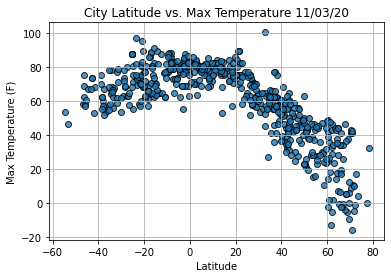

In [72]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

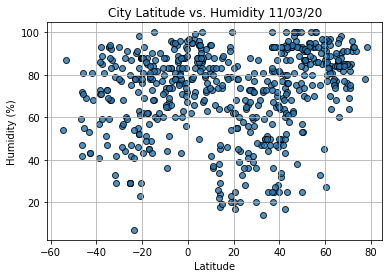

In [73]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

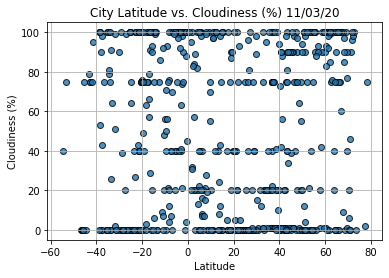

In [74]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

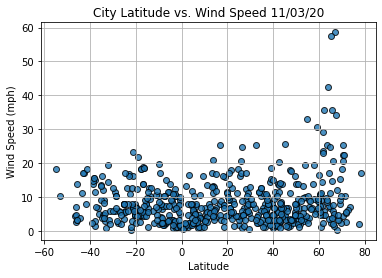

In [75]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [87]:
index13 = newcity_data_df.loc[13]
northern_hemi_df = newcity_data_df.loc[(newcity_data_df["Lat"] >= 0)]
southern_hemi_df = newcity_data_df.loc[(newcity_data_df["Lat"] < 0)]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
1,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
2,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
3,Yulara,AU,2020-11-04 01:10:24,-25.24,130.99,87.80,29,100,8.05
4,Cauquenes,CL,2020-11-04 01:12:32,-35.97,-72.32,56.82,51,0,5.03
7,Punta Arenas,CL,2020-11-04 01:13:21,-53.15,-70.92,46.40,87,75,10.29
8,Payo,ID,2020-11-04 01:17:17,-3.75,103.64,79.41,76,100,0.85
9,New Norfolk,AU,2020-11-04 01:17:17,-42.78,147.06,73.40,43,75,17.22
11,Puerto Ayora,EC,2020-11-04 01:17:18,-0.74,-90.35,69.01,93,88,5.01
12,Ushuaia,AR,2020-11-04 01:12:58,-54.80,-68.30,53.60,54,40,18.34


In [95]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title("Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
    plt.show()

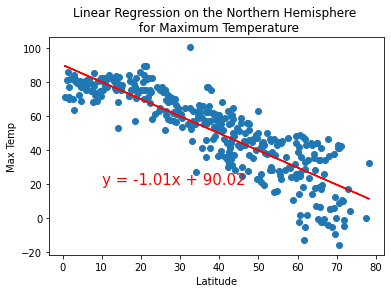

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,20))

In [106]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

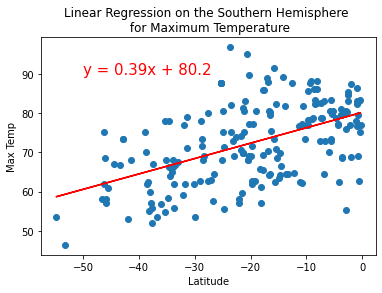

In [108]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-50,90))

In [100]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

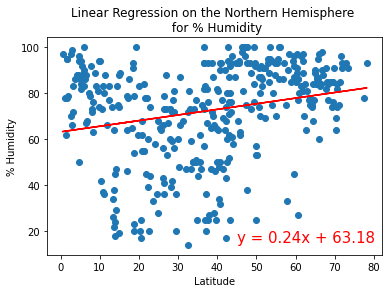

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(45,15))

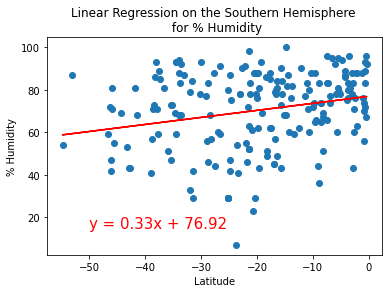

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

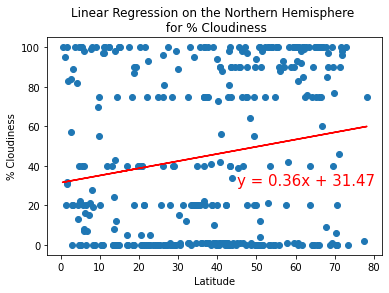

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness',(45,30))

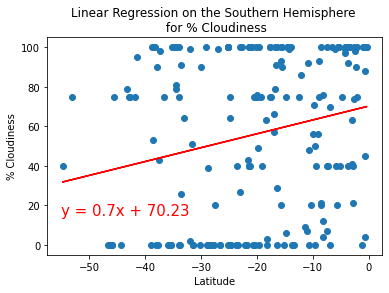

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,15))

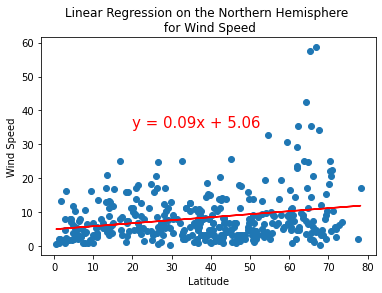

In [119]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,35))

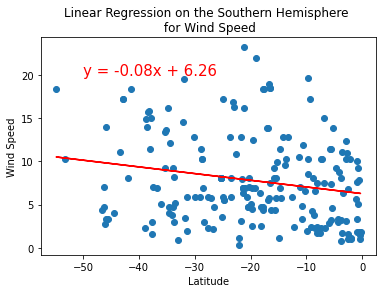

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))